####Libraries

In [ ]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

####Loading the Data

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/MT/MYDATASET_SPC.csv")
print(data)

              State/UT  Year Type_code  \
0     1 ANDHRA PRADESH  2014    CAUSES   
1     1 ANDHRA PRADESH  2014    CAUSES   
2     1 ANDHRA PRADESH  2014    CAUSES   
3     1 ANDHRA PRADESH  2014    CAUSES   
4     1 ANDHRA PRADESH  2014    CAUSES   
...                ...   ...       ...   
9355     36 PUDUCHERRY  2018    CAUSES   
9356     36 PUDUCHERRY  2018    CAUSES   
9357     36 PUDUCHERRY  2018    CAUSES   
9358     36 PUDUCHERRY  2018    CAUSES   
9359     36 PUDUCHERRY  2018    CAUSES   

                                          Type  Gender  Total_Suicides  
0                   Bankruptcy or Indebtedness    Male             315  
1                   Suspected/Illicit Relation    Male              31  
2      Cancellation/Non-Settlement of Marriage    Male              16  
3     Not having Children(Barrenness/Impotency    Male               6  
4                           Illness (Aids/STD)    Male              22  
...                                        ...     ...   

####Familiarizing with data

In [ ]:
data.shape

(9360, 6)

In [ ]:
data.head()

,State/UT,Year,Type_code,Type,Gender,Total_Suicides
0,1 ANDHRA PRADESH,2014,CAUSES,Bankruptcy or Indebtedness,Male,315
1,1 ANDHRA PRADESH,2014,CAUSES,Suspected/Illicit Relation,Male,31
2,1 ANDHRA PRADESH,2014,CAUSES,Cancellation/Non-Settlement of Marriage,Male,16
3,1 ANDHRA PRADESH,2014,CAUSES,Not having Children(Barrenness/Impotency,Male,6
4,1 ANDHRA PRADESH,2014,CAUSES,Illness (Aids/STD),Male,22


In [ ]:
data.tail()

,State/UT,Year,Type_code,Type,Gender,Total_Suicides
9355,36 PUDUCHERRY,2018,CAUSES,Professional/Career Problem,Female,0
9356,36 PUDUCHERRY,2018,CAUSES,Property Dispute,Female,0
9357,36 PUDUCHERRY,2018,CAUSES,Unemployment,Female,0
9358,36 PUDUCHERRY,2018,CAUSES,Causes Not known,Female,6
9359,36 PUDUCHERRY,2018,CAUSES,Other Causes (Please Specity),Female,25


In [ ]:
data.columns

Index(['State/UT', 'Year', 'Type_code', 'Type', 'Gender', 'Total_Suicides'], dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9360 entries, 0 to 9359
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   State/UT        9360 non-null   object
 1   Year            9360 non-null   int64 
 2   Type_code       9360 non-null   object
 3   Type            9360 non-null   object
 4   Gender          9360 non-null   object
 5   Total_Suicides  9360 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 438.9+ KB


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,9360.0,2016.000000,1.414289,2014.0,2015.0,2016.0,2017.0,2018.0
Total_Suicides,9360.0,66.809615,256.019384,0.0,0.0,2.0,22.0,4322.0


In [ ]:
data.dtypes

State/UT          object
Year               int64
Type_code         object
Type              object
Gender            object
Total_Suicides     int64
dtype: object

In [ ]:
#correlation for Year and Total_suicides
data.corr()

,Year,Total_Suicides
Year,1.00000,0.00519
Total_Suicides,0.00519,1.00000


*`italicized text`*#### Data Cleaning

####Checking for Missing values in Data





In [ ]:
data.isnull().sum()

State/UT          0
Year              0
Type_code         0
Type              0
Gender            0
Total_Suicides    0
dtype: int64



```
# This is formatted as code

> Indented block


```

#### Removing unwanted columns

In [ ]:
data.drop(columns=['Type_code'],inplace=True)
data.head()

,State/UT,Year,Type,Gender,Total_Suicides
0,1 ANDHRA PRADESH,2014,Bankruptcy or Indebtedness,Male,315
1,1 ANDHRA PRADESH,2014,Suspected/Illicit Relation,Male,31
2,1 ANDHRA PRADESH,2014,Cancellation/Non-Settlement of Marriage,Male,16
3,1 ANDHRA PRADESH,2014,Not having Children(Barrenness/Impotency,Male,6
4,1 ANDHRA PRADESH,2014,Illness (Aids/STD),Male,22


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


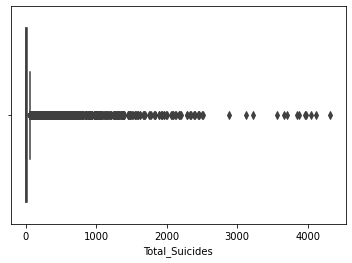

7.882124706074404

In [ ]:
#Dealing with Outliers
sns.boxplot(data.Total_Suicides)
plt.show()
data['Total_Suicides'].skew()

In [ ]:
!pip install feature_engine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


{'Total_Suicides': -317.21946024346477} {'Total_Suicides': 450.8386910126955}


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


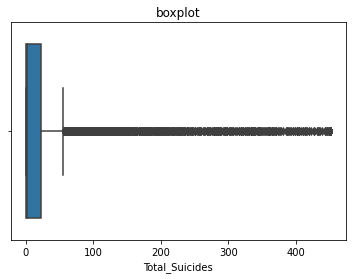

In [ ]:
from feature_engine.outliers import Winsorizer
win = Winsorizer(capping_method='gaussian',tail='both',fold=1.5,variables=['Total_Suicides'])

data['Total_Suicides']=win.fit_transform(data[['Total_Suicides']])

print(win.left_tail_caps_,win.right_tail_caps_)

sns.boxplot(data.Total_Suicides)
plt.title('boxplot')
plt.show()

In [ ]:
data['Total_Suicides'].skew()

3.102705872443521

#### Total Suicides in India Statewise

In [ ]:
data.groupby('State/UT').Total_Suicides.sum().sort_values(ascending=False)

State/UT
15 MAHARASHTRA         40526.063714
24 TAMIL NADU          33719.031567
12 KARNATAKA           33030.547641
14 MADHYA PRADESH      32513.386332
29 WEST BENGAL         27526.676803
25 TELANGANA           24990.483348
13 KERALA              24704.160730
7  GUJARAT             24256.451202
1 ANDHRA PRADESH       22617.451202
5 CHHATTISGARH         19090.612511
20 ODISHA              17068.419056
22 RAJASTHAN           15738.064292
27 UTTAR PRADESH       14830.225601
8  HARYANA             11442.032146
3 ASSAM                11244.516073
34 DELHI (UT)           9499.193455
21 PUNJAB               6410.838691
11 JHARKHAND            5700.000000
26 TRIPURA              3574.000000
36 PUDUCHERRY           2983.000000
9  HIMACHAL PRADESH     2661.000000
4 BIHAR                 2005.000000
28 UTTARAKHAND          1497.000000
10 JAMMU & KASHMIR      1324.000000
6  GOA                  1162.000000
23 SIKKIM               1130.000000
30 A & N ISLANDS         757.000000
17 MEGHALAYA       

####Total Suicides In India Year Wise

In [ ]:
D=data.groupby('Year').Total_Suicides.sum().sort_values()
data

,State/UT,Year,Type,Gender,Total_Suicides
0,1 ANDHRA PRADESH,2014,Bankruptcy or Indebtedness,Male,315.0
1,1 ANDHRA PRADESH,2014,Suspected/Illicit Relation,Male,31.0
2,1 ANDHRA PRADESH,2014,Cancellation/Non-Settlement of Marriage,Male,16.0
3,1 ANDHRA PRADESH,2014,Not having Children(Barrenness/Impotency,Male,6.0
4,1 ANDHRA PRADESH,2014,Illness (Aids/STD),Male,22.0
...,...,...,...,...,...
9355,36 PUDUCHERRY,2018,Professional/Career Problem,Female,0.0
9356,36 PUDUCHERRY,2018,Property Dispute,Female,0.0
9357,36 PUDUCHERRY,2018,Unemployment,Female,0.0
9358,36 PUDUCHERRY,2018,Causes Not known,Female,6.0


###Total Suicides In India Gender Wise

In [ ]:
data.groupby('Gender').Total_Suicides.sum().sort_values()


Gender
Female    148608.965539
Male      246775.188826
Name: Total_Suicides, dtype: float64

###Total Suicides In India State and Year Wise

In [ ]:
data.groupby(['State/UT','Year'])[['Total_Suicides']].sum()

Total_Suicides
State/UT            Year                
1 ANDHRA PRADESH    2014     4696.193455
                    2015     4798.193455
                    2016     4297.193455
                    2017     4511.516073
                    2018     4314.354764
...                                  ...
9  HIMACHAL PRADESH 2014      583.000000
                    2015      184.000000
                    2016      616.000000
                    2017      557.000000
                    2018      721.000000

[180 rows x 1 columns]

###Total Suicides In India State and Gender Wise


In [ ]:
data.groupby(['State/UT','Gender'])[['Total_Suicides']].sum()

Total_Suicides
State/UT            Gender                
1 ANDHRA PRADESH    Female     7962.709528
                    Male      14654.741674
10 JAMMU & KASHMIR  Female      688.000000
                    Male        636.000000
11 JHARKHAND        Female     1713.000000
...                                    ...
7  GUJARAT          Male      13406.064292
8  HARYANA          Female     3543.000000
                    Male       7899.032146
9  HIMACHAL PRADESH Female     1060.000000
                    Male       1601.000000

[72 rows x 1 columns]

###Total Suicides In India Statewise and CauseWise

In [ ]:
data.groupby(['State/UT','Type'])['Total_Suicides'].sum()

State/UT             Type                                   
1 ANDHRA PRADESH     Bankruptcy or Indebtedness                 1718.0
                     Cancellation/Non-Settlement of Marriage     149.0
                     Cancer                                       83.0
                     Causes Not known                           2080.0
                     Death of Dear Person                        258.0
                                                                 ...  
9  HIMACHAL PRADESH  Poverty                                      26.0
                     Professional/Career Problem                  59.0
                     Property Dispute                             83.0
                     Suspected/Illicit Relation                   33.0
                     Unemployment                                151.0
Name: Total_Suicides, Length: 936, dtype: float64

###Total Suicides In India Statewise and CauseWise

In [ ]:
data.groupby(['Type','Gender'])['Total_Suicides'].sum()

Type                                      Gender
Bankruptcy or Indebtedness                Female     1599.000000
                                          Male      11178.064292
Cancellation/Non-Settlement of Marriage   Female     3771.000000
                                          Male       4385.000000
Cancer                                    Female     1314.000000
                                          Male       3232.000000
Causes Not known                          Female    18997.419056
                                          Male      31162.031567
Death of Dear Person                      Female     1822.000000
                                          Male       3212.000000
Divorce                                   Female     2059.000000
                                          Male       2240.000000
Dowry Dispute                             Female     2965.677382
                                          Male       1001.000000
Drug Abuse/Addiction                     

In [ ]:
data.groupby('Type').Total_Suicides.sum().sort_values(ascending=False)

Type
Family Problems                             71062.288157
Other Causes (Please Specity)               59056.127427
Causes Not known                            50159.450624
Other Prolonged Illness                     39290.611933
Insanity/Mental Illness                     37631.322039
Love Affairs                                22771.000000
Drug Abuse/Addiction                        16169.935129
Bankruptcy or Indebtedness                  12777.064292
Failure in Examination                      12202.000000
Unemployment                                11887.838691
Cancellation/Non-Settlement of Marriage      8156.000000
Property Dispute                             8119.000000
Professional/Career Problem                  7729.000000
Poverty                                      6263.838691
Death of Dear Person                         5034.000000
Cancer                                       4546.000000
Divorce                                      4299.000000
Dowry Dispute             

####Data Visualization

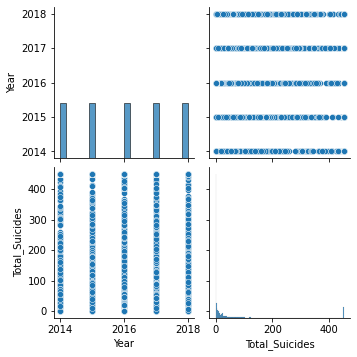

In [ ]:
#pair plot
sns.pairplot(data)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f64e9f4ed90>,
      dtype=object)

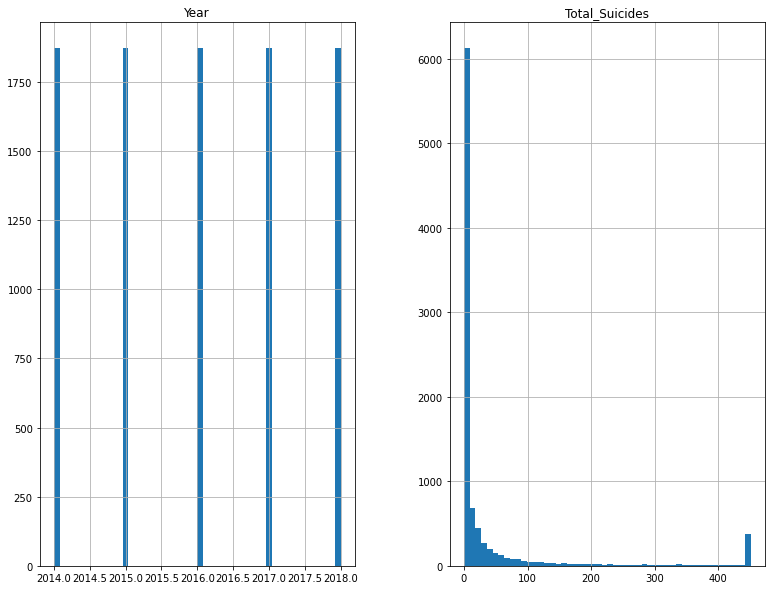

In [ ]:
#hist plot
data.hist(bins = 50,figsize = (13,10))


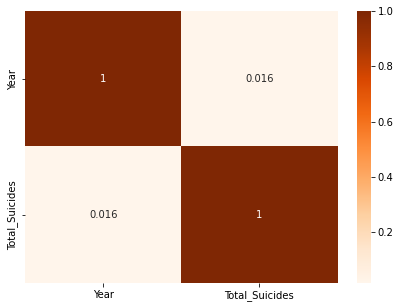

In [ ]:
#Correlation heatmap
plt.figure(figsize=(7,5))
sns.heatmap(data.corr(), annot=True, cmap='Oranges')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


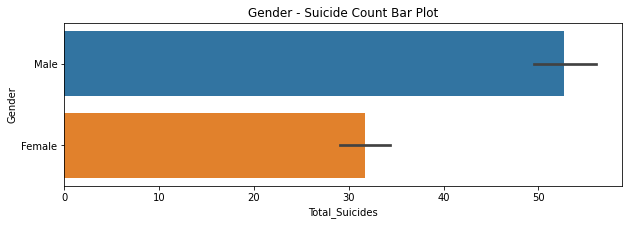

In [ ]:
#Gender and suicide count bar plot
plt.figure(figsize=(10,3))
sns.barplot(data.Total_Suicides,data.Gender)
plt.title('Gender - Suicide Count Bar Plot')
plt.show()

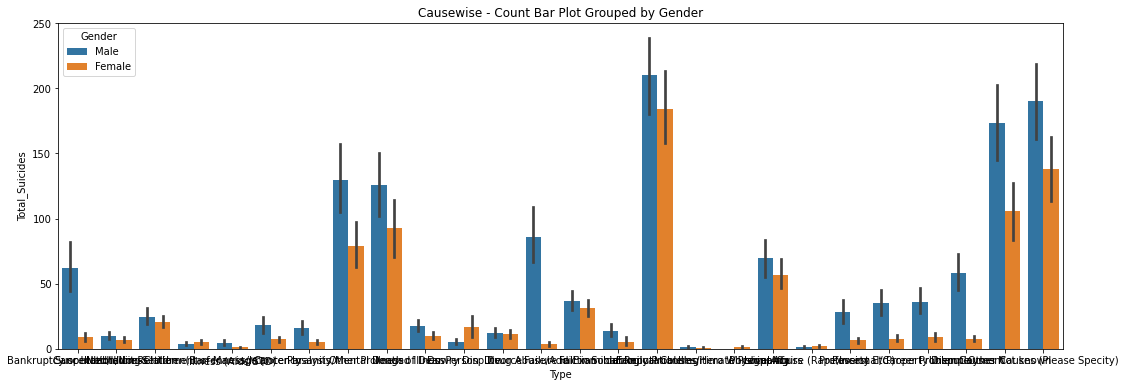

In [ ]:
#Causewise - Count Bar Plot Grouped by Gender
plt.figure(figsize=(18,6))
sns.barplot(x = "Type", y = "Total_Suicides", hue = "Gender", data = data)
plt.title("Causewise - Count Bar Plot Grouped by Gender")
plt.show()

###Data Wrangling

In [ ]:
#Feature Transformation
data['Total_Suicides'].skew() ## fairly symmetrical

3.102705872443521

1.359988273938326

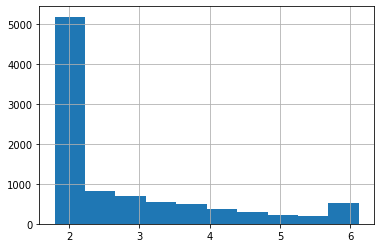

In [ ]:
data['Total_Suicides']=np.log(data['Total_Suicides']+6)
data['Total_Suicides'].hist()
data['Total_Suicides'].skew()

####Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
categorical = ['State/UT', 'Year','Type', 'Gender']
le = sklearn.preprocessing.LabelEncoder()

for column in categorical:
    data[column] = le.fit_transform(data[column])

In [ ]:
data

,State/UT,Year,Type,Gender,Total_Suicides
0,0,0,0,1,5.771441
1,0,0,24,1,3.610918
2,0,0,1,1,3.091042
3,0,0,16,1,2.484907
4,0,0,13,1,3.332205
...,...,...,...,...,...
9355,29,4,22,0,1.791759
9356,29,4,23,0,1.791759
9357,29,4,25,0,1.791759
9358,29,4,3,0,2.484907


###Feature Scaling

####Scaling the numerical data columns with RobustScalar

In [ ]:
numerical = ['Total_Suicides']

from sklearn.preprocessing import RobustScaler

rc = RobustScaler()
data[numerical] = rc.fit_transform(data[numerical])

In [ ]:
data.head()

,State/UT,Year,Type,Gender,Total_Suicides
0,0,0,0,1,2.396710
1,0,0,24,1,0.994178
2,0,0,1,1,0.656694
3,0,0,16,1,0.263213
4,0,0,13,1,0.813247


###Splitting

In [ ]:
datac=data.copy(deep=True)

In [ ]:
X = datac.drop('Total_Suicides',axis=1)
y = datac['Total_Suicides']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape

((7488, 4), (1872, 4))

###Model Building

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

In [ ]:
ML_Model = []
acc_train = []
acc_test = []
rmse_train = []
rmse_test = []

#function to call for storing the results
def storeResults(model, a,b,c,d):
    ML_Model.append(model)
    acc_train.append(round(a, 3))
    acc_test.append(round(b, 3))
    rmse_train.append(round(c, 3))
    rmse_test.append(round(d, 3))

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# instantiate the model
knn = KNeighborsRegressor()

param_grid = {'n_neighbors':list(range(1, 31)), 'weights': ['uniform', 'distance']}

# instantiate the grid
knn_grid = GridSearchCV(knn, param_grid , cv=10)

# fit the model 
knn_grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']})

In [ ]:
knn_para = knn_grid.best_params_
print(knn_para)

{'n_neighbors': 4, 'weights': 'distance'}


In [ ]:
#predicting the target value from the model for the samples
y_train_knn = knn_grid.predict(X_train)
y_test_knn = knn_grid.predict(X_test)

In [ ]:
#computing the accuracy of the model performance
acc_train_knn = knn_grid.score(X_train, y_train) 
acc_test_knn = knn_grid.score(X_test, y_test)

#computing root mean squared error (RMSE)
rmse_train_knn = np.sqrt(mean_squared_error(y_train, y_train_knn))
rmse_test_knn = np.sqrt(mean_squared_error(y_test, y_test_knn))

print("KNN: Accuracy on training Data: {:.3f}".format(acc_train_knn))
print("KNN: Accuracy on test Data: {:.3f}".format(acc_test_knn))
print('\nKNN: The RMSE of the training set is:', rmse_train_knn)
print('KNN: The RMSE of the testing set is:', rmse_test_knn)

KNN: Accuracy on training Data: 1.000
KNN: Accuracy on test Data: 0.700

KNN: The RMSE of the training set is: 0.0
KNN: The RMSE of the testing set is: 0.4526060736347231


In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('k-Nearest Neighbors Regression', acc_train_knn, acc_test_knn, rmse_train_knn, rmse_test_knn)

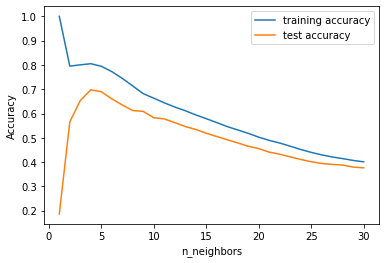

In [ ]:
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 20
neighbors_settings = range(1, 31)
for n in neighbors_settings:
    # fit the model
    knn = KNeighborsRegressor(n_neighbors=n)
    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(knn.score(X_test, y_test))

#plotting the training & testing accuracy for n_neighbours from 1 to 30
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("n_neighbors")
plt.legend()

In [ ]:
# Linear regression model 
from sklearn.linear_model import LinearRegression

# instantiate the model
lr = LinearRegression()
# fit the model 
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
#predicting the target value from the model for the samples
y_test_lr = lr.predict(X_test)
y_train_lr = lr.predict(X_train)

#####Performance Evaluation

In [ ]:
#computing the accuracy of the model performance
acc_train_lr = lr.score(X_train, y_train)
acc_test_lr = lr.score(X_test, y_test)

#computing root mean squared error (RMSE)
rmse_train_lr = np.sqrt(mean_squared_error(y_train, y_train_lr))
rmse_test_lr = np.sqrt(mean_squared_error(y_test, y_test_lr))

print("Linear Regression: Accuracy on training Data: {:.3f}".format(acc_train_lr))
print("Linear Regression: Accuracy on test Data: {:.3f}".format(acc_test_lr))
print('\nLinear Regression: The RMSE of the training set is:', rmse_train_lr)
print('Linear Regression: The RMSE of the testing set is:', rmse_test_lr)

Linear Regression: Accuracy on training Data: 0.037
Linear Regression: Accuracy on test Data: 0.045

Linear Regression: The RMSE of the training set is: 0.8075720961476135
Linear Regression: The RMSE of the testing set is: 0.8069819214309291


In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Linear Regression', acc_train_lr, acc_test_lr, rmse_train_lr, rmse_test_lr)


In [ ]:
# Decision Tree regression model 
from sklearn.tree import DecisionTreeRegressor

# instantiate the model 
tree = DecisionTreeRegressor(max_depth=9)
# fit the model 
tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=9)

In [ ]:
#predicting the target value from the model for the samples
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)

In [ ]:
#computing the accuracy of the model performance
acc_train_tree = tree.score(X_train, y_train)
acc_test_tree = tree.score(X_test, y_test)

#computing root mean squared error (RMSE)
rmse_train_tree = np.sqrt(mean_squared_error(y_train, y_train_tree))
rmse_test_tree = np.sqrt(mean_squared_error(y_test, y_test_tree))

print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))
print('\nDecision Tree: The RMSE of the training set is:', rmse_train_tree)
print('Decision Tree: The RMSE of the testing set is:', rmse_test_tree)

Decision Tree: Accuracy on training Data: 0.666
Decision Tree: Accuracy on test Data: 0.643

Decision Tree: The RMSE of the training set is: 0.4751869009370827
Decision Tree: The RMSE of the testing set is: 0.49309540191472573


In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Decision Tree',acc_train_tree, acc_test_tree, rmse_train_tree, rmse_test_tree)

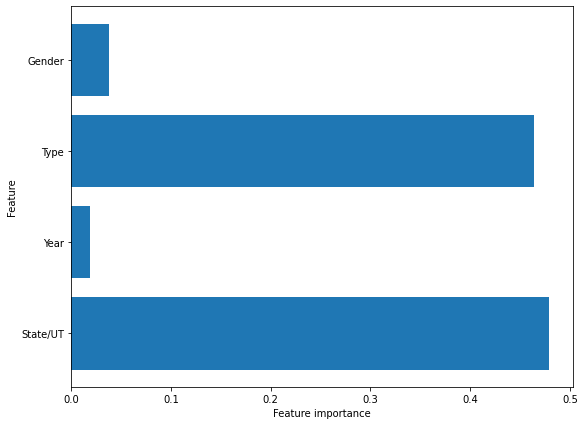

In [ ]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

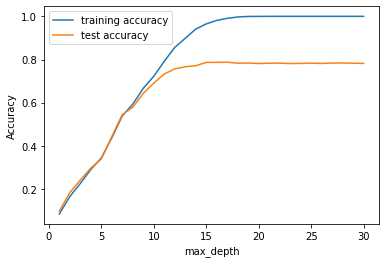

In [ ]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 30
depth = range(1, 31)
for n in depth:
    # fit the model
    tree = DecisionTreeRegressor(max_depth=n)
    tree.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(tree.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(tree.score(X_test, y_test))

#plotting the training & testing accuracy for max_depth from 1 to 30
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_depth")
plt.legend()

In [ ]:
# Random Forest regression model
from sklearn.ensemble import RandomForestRegressor

# instantiate the model
forest = RandomForestRegressor(max_depth=9)

# fit the model 
forest.fit(X_train, y_train)

RandomForestRegressor(max_depth=9)

In [ ]:
#predicting the target value from the model for the samples
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)

In [ ]:
#computing the accuracy of the model performance
acc_train_forest = forest.score(X_train, y_train)
acc_test_forest = forest.score(X_test, y_test)

#computing root mean squared error (RMSE)
rmse_train_forest = np.sqrt(mean_squared_error(y_train, y_train_forest))
rmse_test_forest = np.sqrt(mean_squared_error(y_test, y_test_forest))

print("Random Forest: Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random Forest: Accuracy on test Data: {:.3f}".format(acc_test_forest))
print('\nRandom Forest: The RMSE of the training set is: ', rmse_train_forest)
print('Random Forest: The RMSE of the testing set is: ', rmse_test_forest)

Random Forest: Accuracy on training Data: 0.732
Random Forest: Accuracy on test Data: 0.708

Random Forest: The RMSE of the training set is:  0.4255845497864614
Random Forest: The RMSE of the testing set is:  0.44584708279482976


In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Random Forest',acc_train_forest, acc_test_forest, rmse_train_forest, rmse_test_forest)

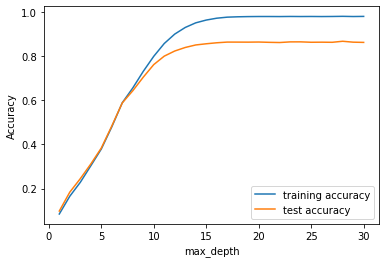

In [ ]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 30
depth = range(1, 31)
for n in depth:
    # fit the model
    forest = RandomForestRegressor(max_depth=n)
    forest.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest.score(X_test, y_test))

#plotting the training & testing accuracy for max_depth from 1 to 30
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_depth")
plt.legend()

In [ ]:
#XGBoost Regression model
from xgboost import XGBRegressor

# instantiate the model
xgb = XGBRegressor(learning_rate=0.2,max_depth=4)
#fit the model
xgb.fit(X_train, y_train)

[18:51:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(learning_rate=0.2, max_depth=4)

In [ ]:
#predicting the target value from the model for the samples
y_test_xgb = xgb.predict(X_test)
y_train_xgb = xgb.predict(X_train)

In [ ]:
#computing the accuracy of the model performance
acc_train_xgb = xgb.score(X_train, y_train)
acc_test_xgb = xgb.score(X_test, y_test)

#computing root mean squared error (RMSE)
rmse_train_xgb = np.sqrt(mean_squared_error(y_train, y_train_xgb))
rmse_test_xgb = np.sqrt(mean_squared_error(y_test, y_test_xgb))

print("XGBoost Regression: Accuracy on training Data: {:.3f}".format(acc_train_xgb))
print("XGBoost Regression: Accuracy on test Data: {:.3f}".format(acc_test_xgb))
print('\nXGBoost Regression: The RMSE of the training set is: ', rmse_train_xgb)
print('XGBoost Regression: The RMSE of the testing set is: ', rmse_test_xgb)

XGBoost Regression: Accuracy on training Data: 0.795
XGBoost Regression: Accuracy on test Data: 0.765

XGBoost Regression: The RMSE of the training set is:  0.372479504391949
XGBoost Regression: The RMSE of the testing set is:  0.4002011143898043


In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('XGBoost Regression',acc_train_xgb, acc_test_xgb, rmse_train_xgb, rmse_test_xgb)

####Comparision Of Models

In [ ]:
#creating dataframe
results = pd.DataFrame({ 'ML Model': ML_Model,    
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test,
    'Train RMSE': rmse_train,
    'Test RMSE': rmse_test})

In [ ]:
results

,ML Model,Train Accuracy,Test Accuracy,Train RMSE,Test RMSE
0,k-Nearest Neighbors Regression,1.000,0.700,0.000,0.453
1,Linear Regression,0.037,0.045,0.808,0.807
2,Decision Tree,0.666,0.643,0.475,0.493
3,Random Forest,0.732,0.708,0.426,0.446
4,XGBoost Regression,0.795,0.765,0.372,0.400


In [ ]:
results.sort_values(by=['Test Accuracy', 'Train Accuracy'], ascending=False)

,ML Model,Train Accuracy,Test Accuracy,Train RMSE,Test RMSE
4,XGBoost Regression,0.795,0.765,0.372,0.400
3,Random Forest,0.732,0.708,0.426,0.446
0,k-Nearest Neighbors Regression,1.000,0.700,0.000,0.453
2,Decision Tree,0.666,0.643,0.475,0.493
1,Linear Regression,0.037,0.045,0.808,0.807


####Conclusion

Among all the training models, XGBoost performance is better and The final Conclusion On Suicide dataset is that Male population are more prone to commit suicide than female and the major causes for commiting suicides are family problems and other causes.